# ***Data Science Intern @ LetsGrowMore***
# ***Author : Dhivya S***


---
# ***Task 1***

# ***BEGINNER LEVEL TASK 01***
## ***1) Iris Flowers Classification ML Project :***

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris 

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import scikitplot as skplt

### Importing Dataset

In [2]:
df=pd.read_csv("Iris (1).csv")

### Analysing Dataset

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.ndim

2

In [7]:
df.shape

(150, 6)

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [14]:
#drop the value of id form dataset
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [16]:
df.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [17]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

### Data Visulaization

In [18]:
import pingouin as pg

In [20]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Species,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.Species,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][0],palette='Pastel1')
    sns.violinplot(y=df[a],x=df.Species,hue='Species',data=df,ax=axes[2][1],palette='Pastel1')
    plt.suptitle(a.title())
    plt.show()

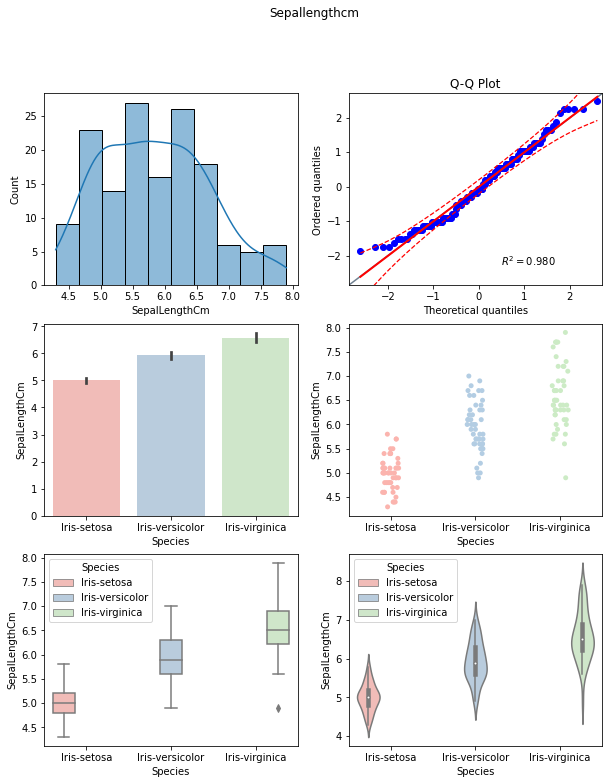

In [21]:
plot_num('SepalLengthCm')

In [22]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.PetalWidthCm ,y=df.SepalWidthCm,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.PetalWidthCm,hue=df.SepalWidthCm,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()

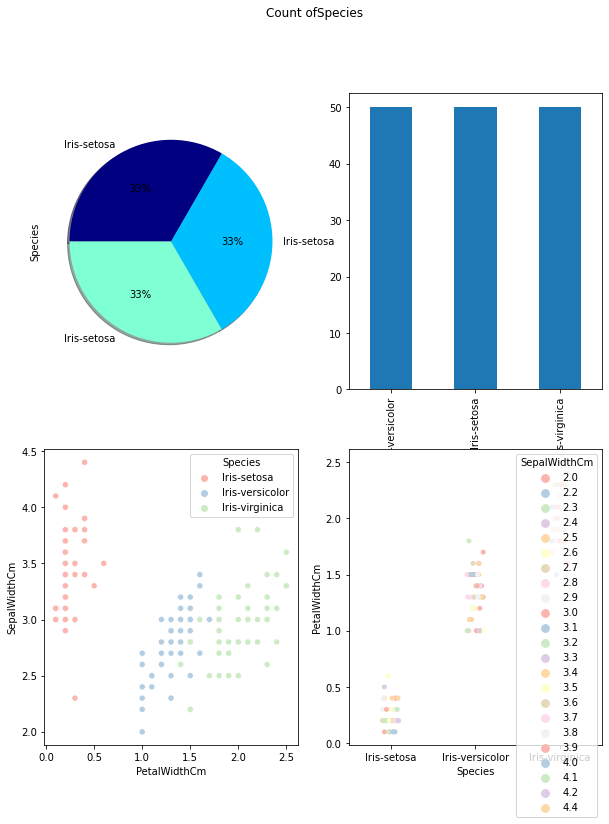

In [23]:
plot_cat('Species')

In [26]:
def plot_kde(a):
    facet=sns.FacetGrid(df,hue='Species',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,df[a].max()))
    plt.title(a.title())
    plt.show()

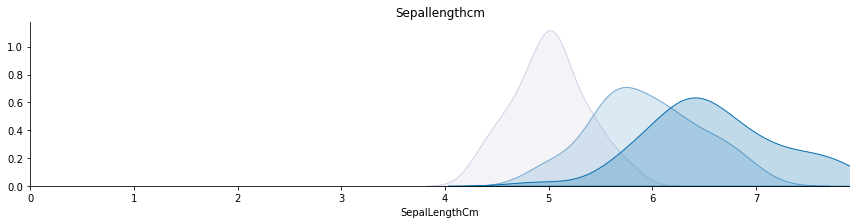

In [27]:
plot_kde('SepalLengthCm')

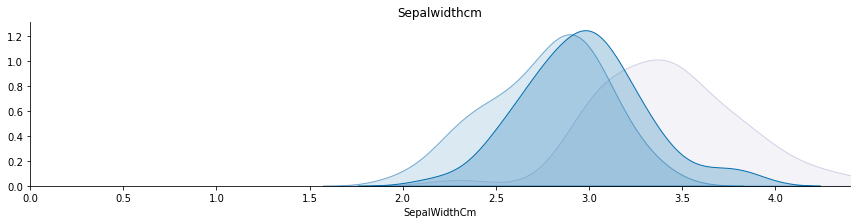

In [28]:
plot_kde('SepalWidthCm')

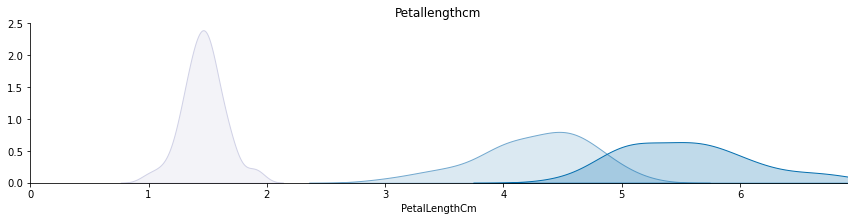

In [29]:
plot_kde('PetalLengthCm')

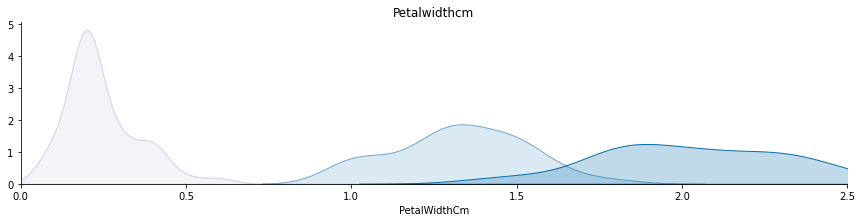

In [30]:
plot_kde('PetalWidthCm')

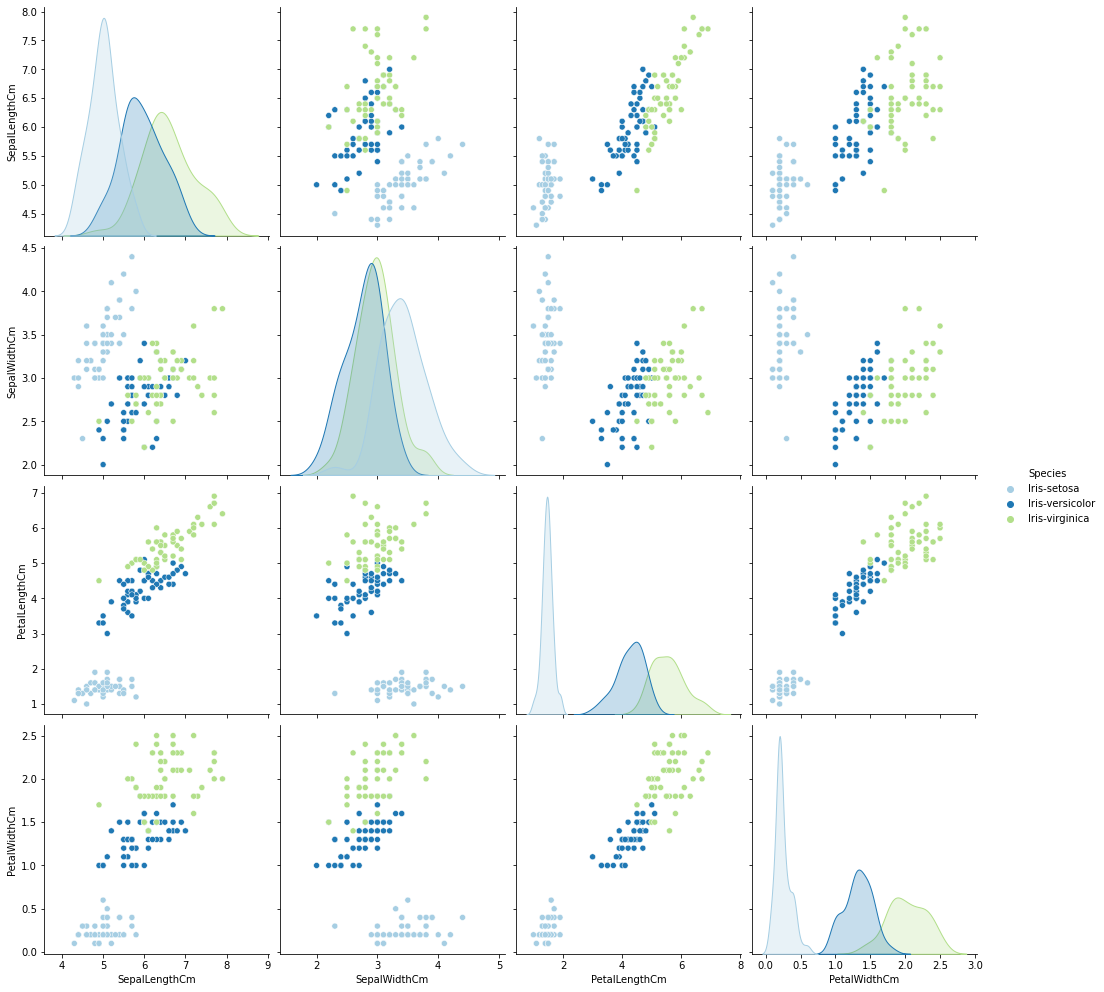

In [31]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Species',height=3.5)
plt.show()

### Data PreProcessing

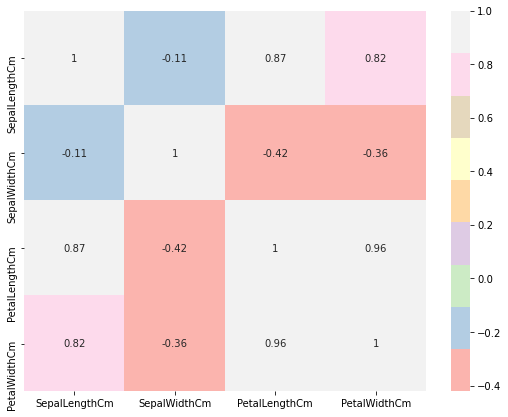

In [32]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

### Label Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Spliting Data

In [50]:
X = df.drop(columns=['Species'])
Y = df['Species']

In [51]:
X[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
Y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

### Supervised Machine Learning Models

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [60]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test, y_pred))

### LogisticRegression

Accuracy: 94.73684210526315


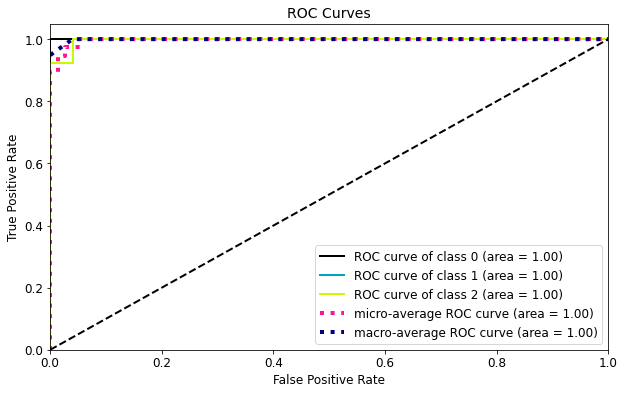

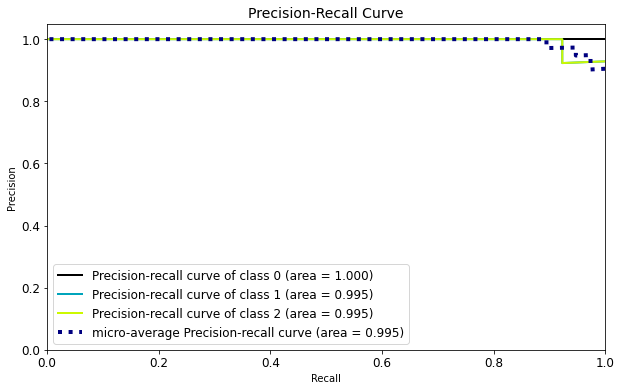

C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\SARAVANAN DIVYA\ana

C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\SARAVANAN DIVYA\ana

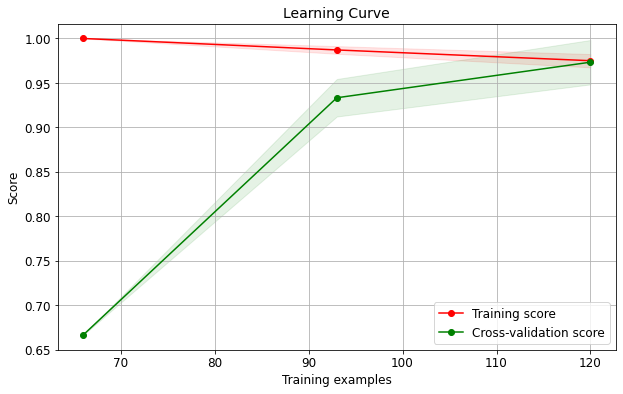

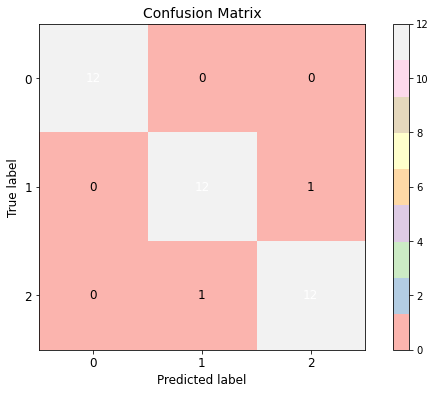

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

### Decision Tree Classifier

Accuracy: 92.10526315789474


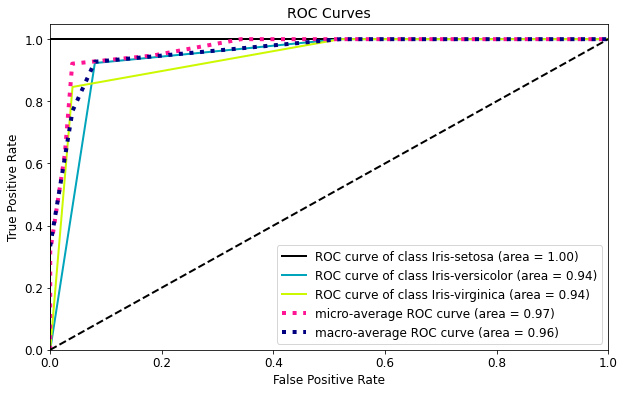

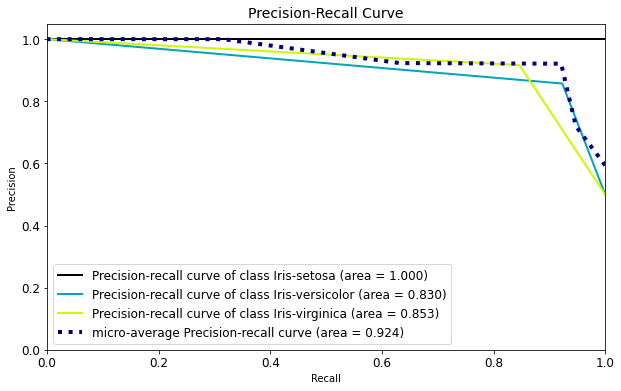

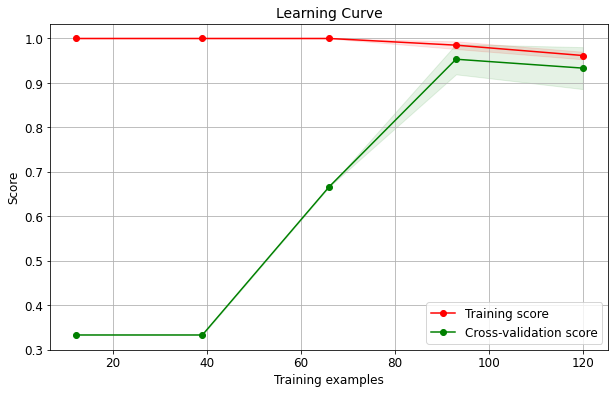

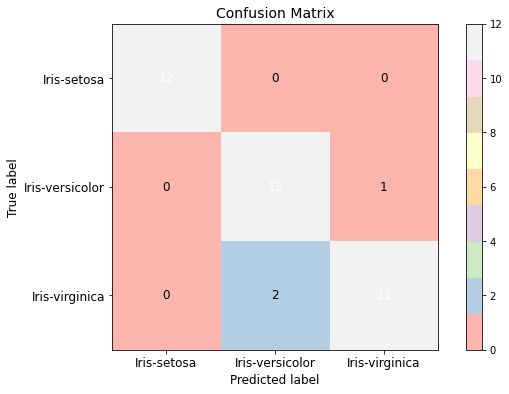

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.85\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.142\nsamples = 39\nvalue = [0, 3, 36]')]

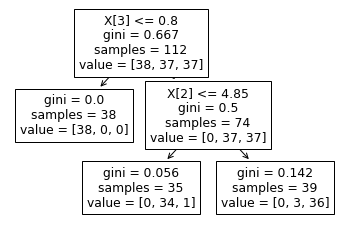

In [62]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2)
classify(tree_clf,X,y)
tree.plot_tree(tree_clf)

### KNN Classifier

Accuracy: 92.10526315789474


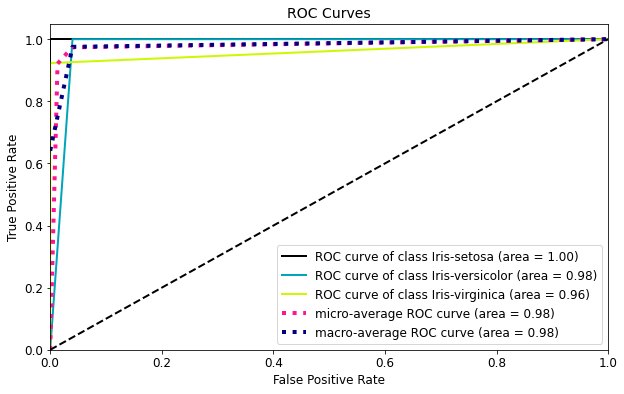

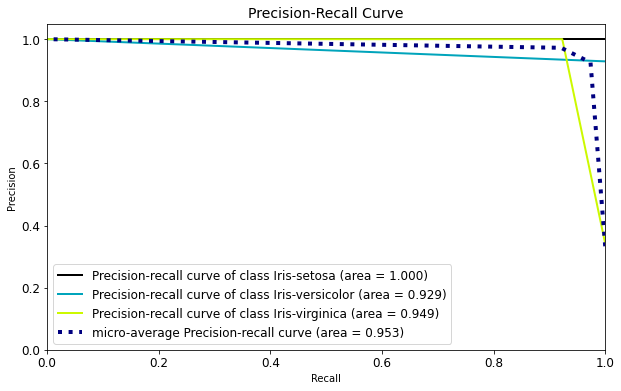

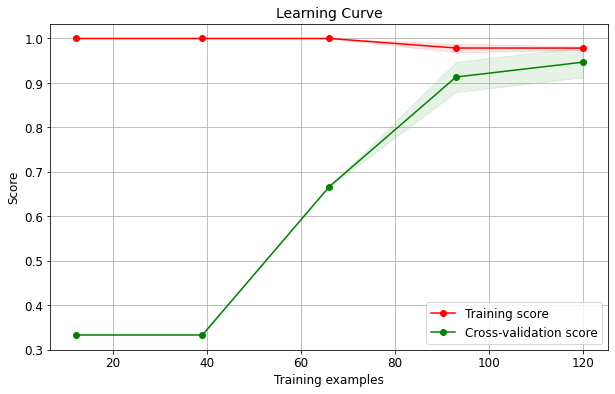

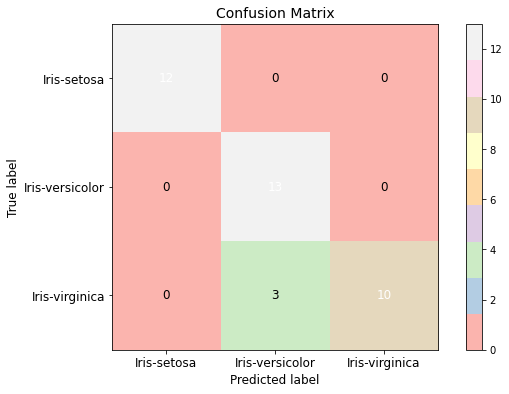

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.92        38
      macro avg       0.94      0.92      0.92        38
   weighted avg       0.94      0.92      0.92        38



In [63]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
classify(model,X,y)

### Support Vector Machine 

Accuracy: 89.47368421052632


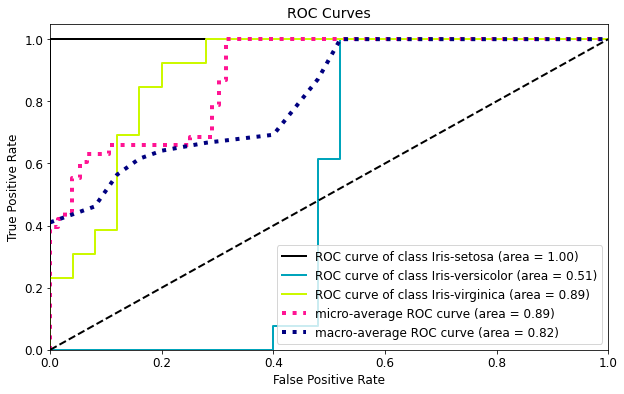

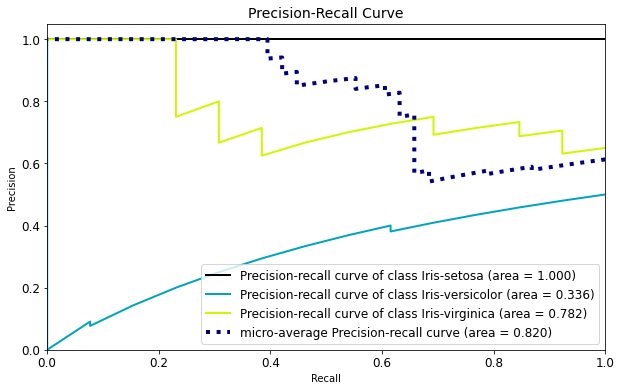

C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\SARAVANAN DIVYA\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score o

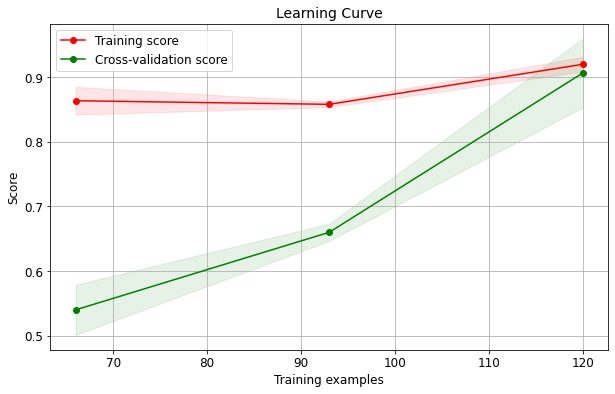

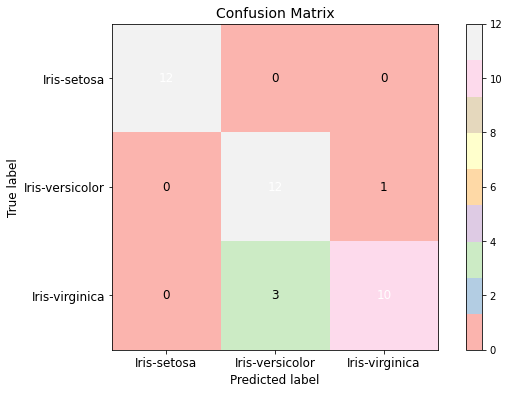

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [64]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma=0.002,probability=True )
classify(model, X, y)

### Random Forest Classifier

Accuracy: 89.47368421052632


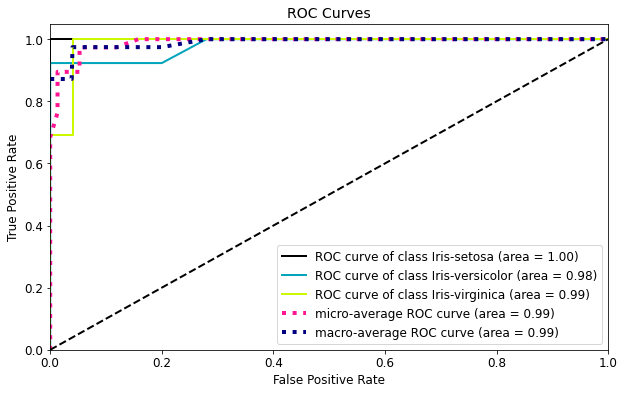

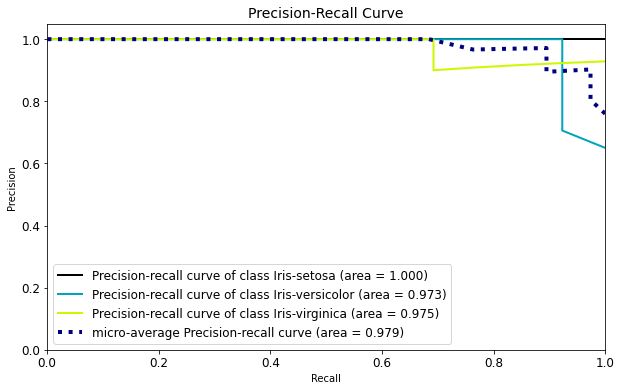

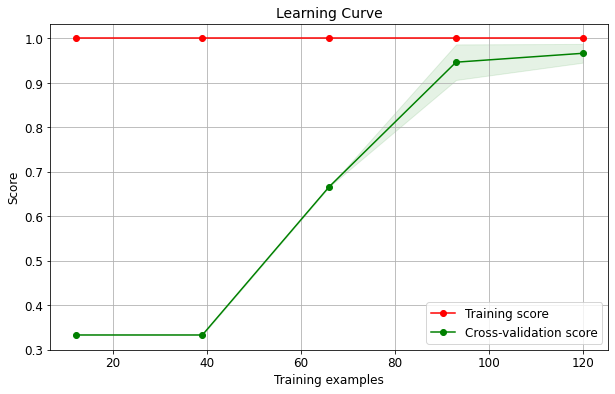

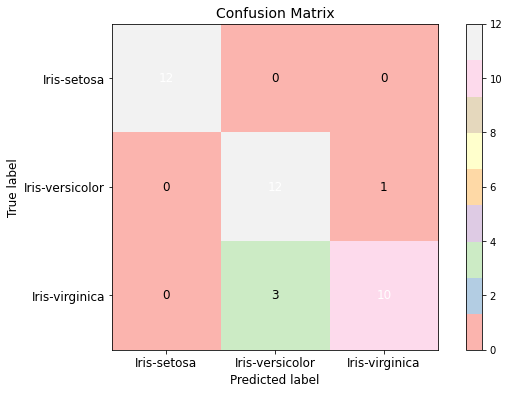

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      0.92      0.86        13
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.90      0.89      0.89        38



In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

## Conclusion :

#### Analysing with diffrent supervised machine learning algorithms Logestic Regression has the highest accuracy of 94 % then the KNN and Decision Tree classifiers with 92%

# Thank You,  LetsGrowMore